In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ECC-Assignment-2").getOrCreate()

df = spark.read.csv("/Users/aditisonawane/Desktop/ECC/a2/Parking_Violations_Issued_-_Fiscal_Year_2023.csv", 
                    header=True, inferSchema=True)


23/04/13 12:31:15 WARN Utils: Your hostname, Aditis-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.167 instead (on interface en0)
23/04/13 12:31:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/13 12:31:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [41]:
df.head(5)

[Row(Summons Number=1484697303, Plate ID='JER1863', Registration State='NY', Plate Type='PAS', Issue Date='06/10/2022', Violation Code=67, Vehicle Body Type='SDN', Vehicle Make='TOYOT', Issuing Agency='P', Street Code1=34330, Street Code2=179, Street Code3=0, Vehicle Expiration Date=20221210, Violation Location=10, Violation Precinct=10, Issuer Precinct=1, Issuer Code=160195, Issuer Command='0001', Issuer Squad='0000', Violation Time='1037A', Time First Observed=None, Violation County='NY', Violation In Front Of Or Opposite='F', House Number=None, Street Name='W 28TH ST', Intersecting Street='CHELSEA PK', Date First Observed=0, Law Section=408, Sub Division='E3', Violation Legal Code=None, Days Parking In Effect    ='BBBBBBB', From Hours In Effect='ALL', To Hours In Effect='ALL', Vehicle Color='BLK', Unregistered Vehicle?=0, Vehicle Year=2004, Meter Number='-', Feet From Curb=0, Violation Post Code=None, Violation Description=None, No Standing or Stopping Violation=None, Hydrant Violat

In [2]:
df.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Plate Type: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Issuing Agency: string (nullable = true)
 |-- Street Code1: integer (nullable = true)
 |-- Street Code2: integer (nullable = true)
 |-- Street Code3: integer (nullable = true)
 |-- Vehicle Expiration Date: integer (nullable = true)
 |-- Violation Location: integer (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Issuer Code: integer (nullable = true)
 |-- Issuer Command: string (nullable = true)
 |-- Issuer Squad: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Time First Observed: string (nullable = true)
 |-- Violation Coun

In [42]:
print(df.count())

11535314


In [43]:
for column in df.columns:
    print(column, ":", "Null values: ", df.filter(df[column].isNull()).count())

Summons Number : Null values:  0


Plate ID : Null values:  1


Registration State : Null values:  0


Plate Type : Null values:  0


Issue Date : Null values:  0


Violation Code : Null values:  0


Vehicle Body Type : Null values:  27240


Vehicle Make : Null values:  9690


Issuing Agency : Null values:  0


Street Code1 : Null values:  0


Street Code2 : Null values:  0


Street Code3 : Null values:  0


Vehicle Expiration Date : Null values:  0


Violation Location : Null values:  5349526


Violation Precinct : Null values:  0


Issuer Precinct : Null values:  0


Issuer Code : Null values:  0


Issuer Command : Null values:  5344155


Issuer Squad : Null values:  5741691


Violation Time : Null values:  123


Time First Observed : Null values:  10881550


Violation County : Null values:  42634


Violation In Front Of Or Opposite : Null values:  5404277


House Number : Null values:  5446068


Street Name : Null values:  1310


Intersecting Street : Null values:  5369958


Date First Observed : Null values:  0


Law Section : Null values:  0


Sub Division : Null values:  1681


Violation Legal Code : Null values:  6191157


Days Parking In Effect     : Null values:  5444990


From Hours In Effect : Null values:  7964864


To Hours In Effect : Null values:  7964879


Vehicle Color : Null values:  1032007


Unregistered Vehicle? : Null values:  11297515


Vehicle Year : Null values:  0


Meter Number : Null values:  10238122


Feet From Curb : Null values:  0


Violation Post Code : Null values:  5979457


Violation Description : Null values:  238417


No Standing or Stopping Violation : Null values:  11535314


Hydrant Violation : Null values:  11535314


Double Parking Violation : Null values:  11535314


In [44]:
#1.1
from pyspark.sql.functions import to_date, count
from pyspark.sql.types import DateType

df = df.withColumn("Issue Date", to_date(df["Issue Date"], "MM/dd/yyyy").cast(DateType()))

ncount = df.groupBy("Issue Date").agg(count("*").alias("Total number of tickets issued"))
ncount = ncount.orderBy("Total number of tickets issued", ascending=False)
ncount.show(10)

+----------+------------------------------+
|Issue Date|Total number of tickets issued|
+----------+------------------------------+
|2022-08-04|                         66726|
|2022-08-05|                         65393|
|2022-08-02|                         64876|
|2022-06-30|                         64846|
|2022-07-19|                         64815|
|2022-11-25|                         64411|
|2022-08-11|                         64192|
|2022-08-18|                         63975|
|2022-07-12|                         63780|
|2022-07-15|                         63646|
+----------+------------------------------+
only showing top 10 rows



In [45]:
#1.1
from pyspark.sql.functions import col, concat, lit, substring

vtcount = df.groupBy("Violation Time").agg(count("*").alias("Total number of tickets issued"))
vtcount = vtcount.orderBy("Total number of tickets issued", ascending=False)

vtcount = vtcount.withColumn("Time", concat(substring(col("Violation Time"), 1, 2), lit(":"), 
                                            substring(col("Violation Time"), 3, 2), lit(" AM")))
vtcount = vtcount.drop("Violation Time")
vtcount.show(10,False)


+------------------------------+--------+
|Total number of tickets issued|Time    |
+------------------------------+--------+
|22958                         |08:36 AM|
|21772                         |08:39 AM|
|21712                         |09:06 AM|
|21588                         |08:40 AM|
|21585                         |08:38 AM|
|21074                         |08:37 AM|
|20883                         |08:41 AM|
|20765                         |09:08 AM|
|20660                         |08:42 AM|
|20564                         |11:41 AM|
+------------------------------+--------+
only showing top 10 rows



In [47]:
#1.2
from pyspark.sql.functions import year, count

total = df.select(year('Issue Date').alias('Year'), 'Vehicle Body Type').groupBy('Year', 'Vehicle Body Type')
        .agg(count('*').alias('Total Number of Tickets')).orderBy('Total Number of Tickets', ascending=False)

total.show(10)


+----+-----------------+-----------------------+
|Year|Vehicle Body Type|Total Number of Tickets|
+----+-----------------+-----------------------+
|2022|             SUBN|                3909852|
|2022|             4DSD|                2432083|
|2023|             SUBN|                1050497|
|2022|              VAN|                 676542|
|2023|             4DSD|                 635016|
|2022|               UT|                 317138|
|2022|             PICK|                 258757|
|2022|             DELV|                 196646|
|2022|               SD|                 192466|
|2023|              VAN|                 183923|
+----+-----------------+-----------------------+
only showing top 10 rows



In [48]:
#1.2

vycount = df.groupBy('Vehicle Year','Vehicle Body Type').agg(count("*").alias("Total number of tickets issued"))
vycount = vycount.filter(vycount['Vehicle Year']!=0)
vycount = vycount.orderBy("Total number of tickets issued", ascending=False)
vycount.show(10)

+------------+-----------------+------------------------------+
|Vehicle Year|Vehicle Body Type|Total number of tickets issued|
+------------+-----------------+------------------------------+
|        2021|             SUBN|                        574105|
|        2020|             SUBN|                        474581|
|        2022|             SUBN|                        450725|
|        2019|             SUBN|                        427511|
|        2018|             SUBN|                        330480|
|        2017|             SUBN|                        268854|
|        2016|             SUBN|                        216894|
|        2015|             SUBN|                        206983|
|        2017|             4DSD|                        203948|
|        2018|             4DSD|                        199032|
+------------+-----------------+------------------------------+
only showing top 10 rows



In [49]:
#1.3
wcount = df.groupBy("Violation Location").agg(count("*").alias("Total number of tickets issued"))
wcount = wcount.filter(col("Violation Location").isNotNull())
wcount = wcount.orderBy("Total number of tickets issued", ascending=False)
wcount.show(10)


+------------------+------------------------------+
|Violation Location|Total number of tickets issued|
+------------------+------------------------------+
|                19|                        282466|
|                13|                        254057|
|                 6|                        224686|
|               114|                        221523|
|                14|                        190012|
|                18|                        176733|
|                 9|                        162228|
|                 1|                        152429|
|               109|                        137833|
|               115|                        127523|
+------------------+------------------------------+
only showing top 10 rows



In [65]:
#1.4
ccount = df.groupBy("Vehicle Color").agg(count("*").alias("Total number of tickets issued"))
ccount = ccount.filter(col("Vehicle Color").isNotNull())
ccount = ccount.orderBy("Total number of tickets issued", ascending=False)
ccount.show(10)


+-------------+------------------------------+
|Vehicle Color|Total number of tickets issued|
+-------------+------------------------------+
|           GY|                       2275457|
|           WH|                       2055818|
|           BK|                       1992788|
|           BL|                        760235|
|        WHITE|                        671757|
|           RD|                        435989|
|        BLACK|                        424056|
|         GREY|                        308993|
|        SILVE|                        151063|
|         BLUE|                        150435|
+-------------+------------------------------+
only showing top 10 rows



In [10]:
# Kmeans 
from pyspark.sql.functions import col, lower
unique = df.select(col("Vehicle Color")).distinct().filter(col("Vehicle Color").startswith("B"))
unique.show(unique.count(), truncate=False)

+-------------+
|Vehicle Color|
+-------------+
|BKMR         |
|BKGL         |
|BUR          |
|BLTN         |
|BLK          |
|BRWN         |
|BRRD         |
|BKBR         |
|BIEGE        |
|BW           |
|BRBL         |
|BKI          |
|BRCDF        |
|BRN          |
|BLACK        |
|BURGU        |
|BUS          |
|BUE          |
|BLAAC        |
|BKWH         |
|BRGL         |
|BU           |
|BKBK         |
|BKTN         |
|BRONZ        |
|BLB          |
|BL/          |
|BEIGE        |
|BEGE         |
|BLPR         |
|BLUE,        |
|BRZ          |
|B            |
|BKW          |
|BN           |
|BLAK         |
|BLBL         |
|BKH          |
|BL6          |
|BKJ          |
|BIK          |
|BLACJ        |
|BL           |
|BUGE         |
|BLAC         |
|BKPR         |
|BLE          |
|BKGY         |
|BR           |
|BEI          |
|BURG         |
|BGI          |
|BRGR         |
|BLBK         |
|BK+          |
|BROW         |
|BK/          |
|BKL          |
|BWN          |
|BKRD   

In [3]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, when
from pyspark.sql.functions import to_date, count

black_color_codes = ['BLK', 'BK.', 'BCK', 'BK', 'BLK.', 'Black', 'BC', 'BLAC', 'BK/', 'B LAC','BLAAC',
                     'BLAK','B K','BLCK','BACK','BL.','BLC','BLA','BLACL','B L','B LK','BLACK']

df2 = df.select('Vehicle Color', 'Street Code1', 'Street Code2', 'Street Code3')
va = VectorAssembler(inputCols=['Street Code1', 'Street Code2', 'Street Code3'], outputCol='features')
df2 = va.transform(df2).select('Vehicle Color', 'Street Code1', 'Street Code2', 'Street Code3','features')

kmeans = KMeans(k=3)
model = kmeans.fit(df2.select('features'))

td = model.transform(df2)
td.show()

probabilities = td.groupBy('prediction').agg(count(when(col('Vehicle Color').isin(black_color_codes),1))
                                             .alias('Black cars'),count('Vehicle Color').alias('Total')).orderBy('prediction')
probabilities = probabilities.select('prediction','Black cars','Total',(col('Black cars')/col('Total'))
                                     .alias('Probability'))

print(probabilities.show())

test_df = spark.createDataFrame([[34510, 10030, 34050]], ['Street Code1', 'Street Code2', 'Street Code3'])
test_df = va.transform(test_df)
label = model.transform(test_df).select('prediction').collect()[0]['prediction']

print(label)
print(probabilities.filter(col('prediction') == label).show())



23/04/13 12:49:28 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:28 WARN BlockManager: Persisting block rdd_92_7 to disk instead.
23/04/13 12:49:28 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:28 WARN BlockManager: Persisting block rdd_92_5 to disk instead.
23/04/13 12:49:28 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:28 WARN BlockManager: Persisting block rdd_92_2 to disk instead.
23/04/13 12:49:29 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:29 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:29 WARN BlockManager: Persisting block rdd_92_3 to disk instead.
23/04/13 12:49:29 WARN BlockManager: Persisting block rdd_92_0 to disk instead.
23/04/13 12:49:29 WARN MemoryStore: Not enough space to

23/04/13 12:49:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spar

23/04/13 12:49:34 WARN MemoryStore: Not enough space to cache rdd_92_10 in memory! (computed 3.7 MiB so far)
23/04/13 12:49:34 WARN MemoryStore: Not enough space to cache rdd_92_9 in memory! (computed 3.7 MiB so far)
23/04/13 12:49:34 WARN MemoryStore: Not enough space to cache rdd_92_13 in memory! (computed 3.7 MiB so far)
23/04/13 12:49:34 WARN BlockManager: Persisting block rdd_92_13 to disk instead.
23/04/13 12:49:34 WARN BlockManager: Persisting block rdd_92_10 to disk instead.
23/04/13 12:49:34 WARN BlockManager: Persisting block rdd_92_9 to disk instead.
23/04/13 12:49:34 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 5.6 MiB so far)
23/04/13 12:49:34 WARN BlockManager: Persisting block rdd_92_15 to disk instead.
23/04/13 12:49:34 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:34 WARN BlockManager: Persisting block rdd_92_8 to disk instead.
23/04/13 12:49:35 WARN MemoryStore: Not enough space 

23/04/13 12:49:41 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.util.c

23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 8.4 MiB so far)
23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 1673.8 KiB so far)
23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_9 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 29.5 MiB so far)


23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_13 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:42 WARN MemoryStore: Not enough space to cache rdd_92_10 in memory! (computed 44.2 MiB so far)


23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 2.5 MiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 1673.8 KiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_9 in memory! (computed 1673.8 KiB so far)
23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_10 in memory! (computed 1028.2 KiB so far)


23/04/13 12:49:43 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_92_13 in memory! (computed 19.6 MiB so far)


23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 44.2 MiB so far)


23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_96_3 in memory! (computed 8.0 MiB so far)
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 2.5 MiB so far)
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_96_0 in memory! (computed 8.0 MiB so far)
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_96_7 in memory! (computed 8.0 MiB so far)
23/04/13 12:49:44 WARN BlockManager: Persisting block rdd_96_0 to disk instead.
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_96_6 in memory! (computed 8.0 MiB so far)
23/04/13 12:49:44 WARN BlockManager: Persisting block rdd_96_7 to disk instead.
23/04/13 12:49:44 WARN BlockManager: Persisting block rdd_96_6 to disk instead.
23/04/13 12:49:44 WARN BlockManager: Persisting block rdd_96_3 to disk instead.
23/04/13 12:49:44 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:49:44 WARN MemorySto

23/04/13 12:49:46 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:46 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:46 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:46 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_92_12 in memory.
23/04/13 12:49:46 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 384.0 B so far)
23/04/13 12:49:46 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 8.4 MiB so far)


23/04/13 12:49:48 WARN MemoryStore: Not enough space to cache rdd_92_13 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:48 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 44.2 MiB so far)


23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 8.4 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 13.1 MiB so far)
23/04/13 12:49:51 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 8.4 MiB so far)
23/04/13 12:49:51 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcT

23/04/13 12:49:54 WARN MemoryStore: Not enough space to cache rdd_92_9 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:54 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:54 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:54 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 29.5 MiB so far)


23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:56 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 19.6 MiB so far)


23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_9 in memory! (computed 19.6 MiB so far)
23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 44.2 MiB so far)
23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_13 in memory! (computed 29.5 MiB so far)
23/04/13 12:49:59 WARN MemoryStore: Not enough space to cache rdd_92_16 in memory! (computed 1673.8 KiB so far)


23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 44.2 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:01 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:02 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(Rp

23/04/13 12:50:04 WARN MemoryStore: Not enough space to cache rdd_92_10 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:04 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:04 WARN MemoryStore: Not enough space to cache rdd_92_12 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:04 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:04 WARN MemoryStore: Not enough space to cache rdd_92_8 in memory! (computed 44.2 MiB so far)
23/04/13 12:50:05 WARN MemoryStore: Not enough space to cache rdd_100_11 in memory! (computed 8.0 MiB so far)
23/04/13 12:50:05 WARN MemoryStore: Not enough space to cache rdd_100_9 in memory! (computed 2.0 MiB so far)
23/04/13 12:50:05 WARN MemoryStore: Not enough space to cache rdd_100_8 in memory! (computed 8.0 MiB so far)
23/04/13 12:50:05 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 29.5 MiB so far)
23/04/13 12:5

23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:07 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 29.5 MiB so far)


23/04/13 12:50:08 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:08 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 29.5 MiB so far)
23/04/13 12:50:08 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 29.5 MiB so far)


23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:10 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:11 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spar

23/04/13 12:50:11 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:12 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:13 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:13 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:13 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:13 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:14 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 8.4 MiB so far)
23/04/13 12:50:15 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:16 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:16 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:16 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 19.6 MiB so far)


23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:17 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:18 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:18 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:18 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:18 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:19 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:20 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:21 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 44.2 MiB so far)
23/04/13 12:50:21 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtEx

23/04/13 12:50:21 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:21 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:22 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 19.6 MiB so far)


23/04/13 12:50:23 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:23 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:23 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:23 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:24 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 3.7 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:25 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:26 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:26 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:26 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:26 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:27 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:28 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:28 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 19.6 MiB so far)
23/04/13 12:50:28 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 44.2 MiB so far)


23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:29 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 5.6 MiB so far)


23/04/13 12:50:30 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:30 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 44.2 MiB so far)
23/04/13 12:50:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$Block

23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_3 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_0 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_7 in memory! (computed 5.6 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_4 in memory! (computed 8.4 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_6 in memory! (computed 8.4 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_1 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:31 WARN MemoryStore: Not enough space to cache rdd_92_5 in memory! (computed 13.1 MiB so far)


23/04/13 12:50:32 WARN MemoryStore: Not enough space to cache rdd_92_2 in memory! (computed 44.2 MiB so far)
23/04/13 12:50:32 WARN MemoryStore: Not enough space to cache rdd_92_14 in memory! (computed 13.1 MiB so far)
23/04/13 12:50:32 WARN MemoryStore: Not enough space to cache rdd_92_11 in memory! (computed 19.6 MiB so far)


23/04/13 12:50:32 WARN MemoryStore: Not enough space to cache rdd_92_15 in memory! (computed 44.2 MiB so far)


+-------------+------------+------------+------------+--------------------+----------+
|Vehicle Color|Street Code1|Street Code2|Street Code3|            features|prediction|
+-------------+------------+------------+------------+--------------------+----------+
|          BLK|       34330|         179|           0| [34330.0,179.0,0.0]|         0|
|         GRAY|       34310|       16400|       11010|[34310.0,16400.0,...|         0|
|         GRAY|       30640|       13015|       28540|[30640.0,13015.0,...|         0|
|         null|       30640|       13015|       28540|[30640.0,13015.0,...|         0|
|         BLUE|       30640|       13015|       28540|[30640.0,13015.0,...|         0|
|         null|       30640|       13015|       28540|[30640.0,13015.0,...|         0|
|         BLUE|       30640|       13015|       28540|[30640.0,13015.0,...|         0|
|        WHITE|       11585|       26390|       15010|[11585.0,26390.0,...|         0|
|          BLK|           0|           0|  

+----------+----------+-------+-------------------+
|prediction|Black cars|  Total|        Probability|
+----------+----------+-------+-------------------+
|         0|    828135|3885175|0.21315256069546418|
|         1|   1334197|5226789| 0.2552613086160547|
|         2|    342934|1391343|0.24647696506181438|
+----------+----------+-------+-------------------+

None
0


23/04/13 12:50:51 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spar

+----------+----------+-------+-------------------+
|prediction|Black cars|  Total|        Probability|
+----------+----------+-------+-------------------+
|         0|    828135|3885175|0.21315256069546418|
+----------+----------+-------+-------------------+

None


23/04/13 12:51:01 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:593)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:592)
	at org.apache.spar

In [12]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(td)
print("Silhouette with squared euclidean distance = " + str(silhouette))

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.646474686131599
Cluster Centers: 
[2626.82760724 1012.08869562  544.68287738]
[52439.98820488 53710.30883956 53627.01508551]
[27184.08815097 22899.1299727  23195.26674375]


In [13]:
import numpy as np

errors = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features',metricName='silhouette', 
                                distanceMeasure='squaredEuclidean')

for i in range(2,10):
    kmeans=KMeans(featuresCol='features', k=i).fit(df2)
    output=kmeans.transform(df2)
    errors[i] = kmeans.summary.trainingCost
    
    

23/04/11 22:52:56 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 44.2 MiB so far)
23/04/11 22:52:56 WARN BlockManager: Persisting block rdd_267_5 to disk instead.
23/04/11 22:52:56 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 44.2 MiB so far)
23/04/11 22:52:56 WARN BlockManager: Persisting block rdd_267_1 to disk instead.
23/04/11 22:52:56 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 44.2 MiB so far)
23/04/11 22:52:56 WARN BlockManager: Persisting block rdd_267_7 to disk instead.
23/04/11 22:52:56 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 44.2 MiB so far)
23/04/11 22:52:56 WARN BlockManager: Persisting block rdd_267_3 to disk instead.
23/04/11 22:52:56 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 44.2 MiB so far)
23/04/11 22:52:56 WARN BlockManager: Persisting block rdd_267_2 to disk instead.
23/04/11 22:52:56 WARN MemoryStore: Not enoug

23/04/11 22:53:01 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:01 WARN BlockManager: Persisting block rdd_267_8 to disk instead.
23/04/11 22:53:01 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:01 WARN BlockManager: Persisting block rdd_267_13 to disk instead.
23/04/11 22:53:01 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:01 WARN BlockManager: Persisting block rdd_267_15 to disk instead.
23/04/11 22:53:02 WARN MemoryStore: Not enough space to cache rdd_267_10 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:02 WARN BlockManager: Persisting block rdd_267_10 to disk instead.
23/04/11 22:53:02 WARN MemoryStore: Not enough space to cache rdd_267_14 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:02 WARN BlockManager: Persisting block rdd_267_14 to disk instead.
23/04/11 22:53:02 WARN MemoryStore: Not en

23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_9 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 2.5 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:10 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:11 WARN MemoryStore: Not enough space to cache rdd_267_10 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:11 WARN MemoryStore: Not enough space to cache rdd_267_14 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:11 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:11 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_271_6 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_271_3 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_271_1 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_271_4 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:12 WARN BlockManager: Persisting block rdd_271_6 to disk instead.
23/04/11 22:53:12 WARN BlockManager: Persisting block rdd_271_3 to disk instead.
23/04/11 22:53:12 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_267_0 in memory.
23/04/11 22:53:12 WARN BlockManager: Persisting bl

23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_10 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:12 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_267_10 in memory.
23/04/11 22:53:12 WARN MemoryStore: Not enough space to cache rdd_267_10 in memory! (computed 384.0 B so far)
23/04/11 22:53:13 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:13 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:13 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 

23/04/11 22:53:16 WARN MemoryStore: Not enough space to cache rdd_267_14 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:16 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:16 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:16 WARN MemoryStore: Not enough space to cache rdd_267_14 in memory! (computed 8.4 MiB so far)


23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:19 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 29.5 MiB so far)


23/04/11 22:53:21 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:21 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:21 WARN MemoryStore: Not enough space to cache rdd_267_10 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:21 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 29.5 MiB so far)


23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:23 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_9 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:26 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 29.5 MiB so far)


23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_275_4 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:29 WARN MemoryStore: Not enough space to cache rdd_275_5 in memory! (computed 8.0 MiB so far)


23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_9 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:31 WARN MemoryStore: Not enough space to cache rdd_267_11 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:32 WARN MemoryStore: Not enough space to cache rdd_275_11 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:32 WARN MemoryStore: Not enough space to cache rdd_275_12 in memory! (computed 8.0 MiB so far)
23/04/11 22:53:32 WARN MemoryStore: Not enough space to cache rdd_275_9 in memory! (computed 8.0 MiB so far)
23/04/1

23/04/11 22:53:33 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:34 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 29.5 MiB so far)


23/04/11 22:53:35 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:35 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 29.5 MiB so far)
23/04/11 22:53:35 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 29.5 MiB so far)


23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:37 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 5.6 MiB so far)


23/04/11 22:53:38 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:38 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 5.6 MiB so far)


23/04/11 22:53:38 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:39 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:40 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:41 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:42 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:42 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:42 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:42 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:42 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:43 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:44 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:45 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:45 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:45 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:45 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:46 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:47 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:48 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:48 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:48 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:48 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)


23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 3.7 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 19.6 MiB so far)
23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:49 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 44.2 MiB so far)


23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_3 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_7 in memory! (computed 8.4 MiB so far)
23/04/11 22:53:50 WARN MemoryStore: Not enough space to cache rdd_267_6 in memory! (computed 8.4 MiB so far)


23/04/11 22:53:51 WARN MemoryStore: Not enough space to cache rdd_267_2 in memory! (computed 44.2 MiB so far)
23/04/11 22:53:51 WARN MemoryStore: Not enough space to cache rdd_267_12 in memory! (computed 13.1 MiB so far)
23/04/11 22:53:51 WARN MemoryStore: Not enough space to cache rdd_267_8 in memory! (computed 19.6 MiB so far)


23/04/11 22:53:51 WARN MemoryStore: Not enough space to cache rdd_267_15 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:05 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:05 WARN BlockManager: Persisting block rdd_318_7 to disk instead.
23/04/11 22:54:05 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:05 WARN MemoryStore: Not enough space to cache rdd_318_2 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:05 WARN BlockManager: Persisting block rdd_318_2 to disk instead.
23/04/11 22:54:05 WARN BlockManager: Persisting block rdd_318_5 to disk instead.
23/04/11 22:54:05 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:05 WARN BlockManager: Persisting block rdd_318_0 to disk instead.
23/04/11 22:54:05 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:05 WARN BlockManager: Persisting block rdd_318_3 to disk instead.
23/04/11 22:54:05 WARN MemoryStore: Not enoug

23/04/11 22:54:09 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:09 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 66.3 MiB so far)


23/04/11 22:54:10 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:10 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 1028.2 KiB so far)
23/04/11 22:54:10 WARN BlockManager: Persisting block rdd_318_12 to disk instead.


23/04/11 22:54:11 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:11 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:11 WARN BlockManager: Persisting block rdd_318_11 to disk instead.
23/04/11 22:54:11 WARN BlockManager: Persisting block rdd_318_13 to disk instead.
23/04/11 22:54:11 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:11 WARN BlockManager: Persisting block rdd_318_9 to disk instead.
23/04/11 22:54:11 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:11 WARN BlockManager: Persisting block rdd_318_10 to disk instead.
23/04/11 22:54:11 WARN MemoryStore: Not enough space to cache rdd_318_15 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:11 WARN BlockManager: Persisting block rdd_318_15 to disk instead.
23/04/11 22:54:12 WARN MemoryStore: Not en

23/04/11 22:54:17 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:17 WARN MemoryStore: Not enough space to cache rdd_318_15 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:18 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:18 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_8 in memory! (computed 2.5 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 2.5 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:19 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:20 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:20 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:20 WARN MemoryStore: Not enough space to cache rdd_318_15 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:20 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 19.6 MiB so far)


23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_322_3 in memory! (computed 8.0 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_322_4 in memory! (computed 8.0 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_322_6 in memory! (computed 8.0 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 3.7 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_322_7 in memory! (computed 8.0 MiB so far)
23/04/11 22:54:21 WARN BlockManager: Persisting block rdd_322_6 to disk instead.
23/04/11 22:54:21 WARN BlockManager: Persisting block rdd_322_7 to disk instead.
23/04/11 22:54:21 WARN BlockManager: Persisting block rdd_322_4 to disk instead.
23/04/11 22:54:21 WARN BlockManager: Persisting block rdd_322_3 to disk instead.
23/04/11 22:54:21 WARN

23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_318_8 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:21 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:22 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:22 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:22 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 1028.2 KiB so far)
23/04/11 22:54:22 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:22 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:23 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_2 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:27 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 8.4 MiB so far)


23/04/11 22:54:29 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:29 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:29 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:29 WARN MemoryStore: Not enough space to cache rdd_318_8 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_2 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:31 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:33 WARN MemoryStore: Not enough space to cache rdd_318_15 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:33 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:33 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:33 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:33 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:36 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_11 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_12 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:39 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_2 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:42 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:43 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:43 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 29.5 MiB so far)
23/04/11 22:54:43 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:43 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:45 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:46 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:46 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:46 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:46 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:47 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:48 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:48 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:48 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 22:54:48 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:49 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)


23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:50 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_9 in memory.
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 384.0 B so far)
23/04/11 22:54:50 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 19.6 MiB so far)


23/04/11 22:54:51 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:51 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:51 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:51 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:52 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_13 in memory.
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 384.0 B so far)
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:52 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_14 in memory.
23/04/11 22:54:52 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 384.0 B so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 1028.2 KiB so far)


23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 3.7 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:53 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 5.6 MiB so far)


23/04/11 22:54:54 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:54 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:54 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:54 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:55 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_9 in memory.
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 384.0 B so far)
23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 19.6 MiB so far)


23/04/11 22:54:55 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 19.6 MiB so far)


23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:56 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:57 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 29.5 MiB so far)


23/04/11 22:54:57 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 44.2 MiB so far)
23/04/11 22:54:57 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_10 in memory.
23/04/11 22:54:57 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 384.0 B so far)
23/04/11 22:54:57 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_14 in memory.
23/04/11 22:54:57 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 384.0 B so far)


23/04/11 22:54:58 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 44.2 MiB so far)


23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 8.4 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 19.6 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 22:54:59 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 44.2 MiB so far)


23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 8.4 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:00 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:01 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:01 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 29.5 MiB so far)


23/04/11 22:55:01 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:01 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)


23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 8.4 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_9 in memory.
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 384.0 B so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:02 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 44.2 MiB

23/04/11 22:55:03 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:03 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)


23/04/11 22:55:03 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 19.6 MiB so far)
23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 19.6 MiB so far)


23/04/11 22:55:04 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 44.2 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)


23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 44.2 MiB so far)


23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 22:55:05 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 19.6 MiB so far)
23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 29.5 MiB so far)


23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)


23/04/11 22:55:06 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:40 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:40 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:40 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:41 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:42 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:43 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:43 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:43 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:11:43 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:11:44 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 5.6 MiB so far)


23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:45 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_9 in memory.
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 384.0 B so far)
23/04/11 23:11:45 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:46 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 44.2 MiB

23/04/11 23:11:46 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:11:46 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:11:46 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:11:47 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:47 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:47 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:47 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:11:47 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 13.1 MiB so far)


23/04/11 23:27:21 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:27:21 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 19.6 MiB so far)


23/04/11 23:27:22 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:27:22 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 1028.2 KiB so far)


23/04/11 23:27:22 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:27:22 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:27:23 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_318_9 in memory.
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 384.0 B so far)
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 13.1 MiB so far)


23/04/11 23:27:23 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_1 in memory! (computed 3.7 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_3 in memory! (computed 3.7 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:27:24 WARN MemoryStore: Not enough space to cache rdd_318_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:27:25 WARN MemoryStore: Not enough space to cache rdd_318_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:27:25 WARN MemoryStore: Not enough space to cache rdd_318_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:27:25 WARN MemoryStore: Not enough space to cache rdd_318_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:27:25 WARN MemoryStore: Not enough space to cache rdd_318_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:11 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:11 WARN BlockManager: Persisting block rdd_389_5 to disk instead.
23/04/11 23:37:11 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:11 WARN BlockManager: Persisting block rdd_389_7 to disk instead.
23/04/11 23:37:12 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:12 WARN BlockManager: Persisting block rdd_389_2 to disk instead.
23/04/11 23:37:12 WARN MemoryStore: Not enough space to cache rdd_389_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:12 WARN BlockManager: Persisting block rdd_389_3 to disk instead.
23/04/11 23:37:12 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:12 WARN BlockManager: Persisting block rdd_389_6 to disk instead.
23/04/11 23:37:12 WARN MemoryStore: Not enoug

23/04/11 23:37:16 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:16 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 66.3 MiB so far)


23/04/11 23:37:17 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:18 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 66.3 MiB so far)


23/04/11 23:37:19 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:19 WARN BlockManager: Persisting block rdd_389_11 to disk instead.
23/04/11 23:37:19 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:19 WARN BlockManager: Persisting block rdd_389_12 to disk instead.
23/04/11 23:37:19 WARN MemoryStore: Not enough space to cache rdd_389_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:19 WARN BlockManager: Persisting block rdd_389_10 to disk instead.
23/04/11 23:37:20 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:20 WARN BlockManager: Persisting block rdd_389_9 to disk instead.
23/04/11 23:37:20 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:20 WARN BlockManager: Persisting block rdd_389_14 to disk instead.
23/04/11 23:37:21 WARN MemoryStore: N

23/04/11 23:37:26 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:27 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:27 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:27 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1673.8 KiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_10 in memory! (computed 3.7 MiB so far)
23/04/11 23:37:28 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 13.1 MiB so far)


23/04/11 23:37:29 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:29 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:29 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:29 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:30 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_389_6 in memory.
23/04/11 23:37:30 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_389_2 in memory.
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 384.0 B so far)
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 384.0 B so far)
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:30 WARN MemoryStore: Not enough space to cache rdd_389_11 i

23/04/11 23:37:35 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:35 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:36 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 29.5 MiB so far)


23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:38 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:40 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 29.5 MiB so far)


23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:42 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:43 WARN MemoryStore: Not enough space to cache rdd_393_6 in memory! (computed 8.0 MiB so far)
23/04/11 23:37:43 WARN MemoryStore: Not enough space to cache rdd_393_0 in memory! (computed 8.0 MiB so far)
23/04/11 23:37:43 WARN MemoryStore: Not enough space to cache rdd_393_5 in memory! (computed 8.0 MiB so far)
23/04/11 23:3

23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_10 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:45 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 29.5 MiB so far)


23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:49 WARN MemoryStore: Not enough space to cache rdd_389_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_397_15 in memory! (computed 8.0 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_397_8 in memory! (computed 8.0 MiB so far)
23/04/11 23:37:51 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:53 WARN MemoryStore: Not enough space to cache rdd_389_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 29.5 MiB so far)


23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_15 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)
23/04/11 23:37:55 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:37:57 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 29.5 MiB so far)


23/04/11 23:37:59 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:37:59 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:59 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:59 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:37:59 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 29.5 MiB so far)


23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 2.5 MiB so far)
23/04/11 23:38:00 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:01 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)


23/04/11 23:38:02 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:38:02 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 2.5 MiB so far)
23/04/11 23:38:02 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:02 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:02 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 8.4 MiB so far)


23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:03 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:04 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:05 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:05 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)


23/04/11 23:38:05 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:05 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:05 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:06 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:07 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)


23/04/11 23:38:07 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:08 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 2.5 MiB so far)
23/04/11 23:38:08 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:08 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)


23/04/11 23:38:09 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:10 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:10 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:10 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 29.5 MiB so far)


23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 2.5 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:11 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:12 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)


23/04/11 23:38:13 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:13 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:13 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:13 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:14 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:15 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:16 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:16 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:16 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:16 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:17 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:18 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:19 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 5.6 MiB so far)


23/04/11 23:38:19 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:19 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:19 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:38:20 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_0 in memory! (computed 29.5 MiB so far)


23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_12 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:21 WARN MemoryStore: Not enough space to cache rdd_389_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:22 WARN MemoryStore: Not enough space to cache rdd_389_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:22 WARN MemoryStore: Not enough space to cache rdd_389_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:35 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:35 WARN BlockManager: Persisting block rdd_448_7 to disk instead.
23/04/11 23:38:35 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:35 WARN BlockManager: Persisting block rdd_448_4 to disk instead.
23/04/11 23:38:35 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:35 WARN BlockManager: Persisting block rdd_448_5 to disk instead.
23/04/11 23:38:35 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:35 WARN BlockManager: Persisting block rdd_448_3 to disk instead.
23/04/11 23:38:35 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:35 WARN BlockManager: Persisting block rdd_448_2 to disk instead.
23/04/11 23:38:35 WARN MemoryStore: Not enoug

23/04/11 23:38:39 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 66.3 MiB so far)


23/04/11 23:38:39 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:40 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 66.3 MiB so far)


23/04/11 23:38:40 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 66.3 MiB so far)


23/04/11 23:38:42 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:42 WARN BlockManager: Persisting block rdd_448_12 to disk instead.
23/04/11 23:38:42 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:42 WARN BlockManager: Persisting block rdd_448_15 to disk instead.
23/04/11 23:38:42 WARN MemoryStore: Not enough space to cache rdd_448_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:42 WARN BlockManager: Persisting block rdd_448_13 to disk instead.
23/04/11 23:38:43 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:43 WARN BlockManager: Persisting block rdd_448_9 to disk instead.
23/04/11 23:38:43 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:43 WARN BlockManager: Persisting block rdd_448_10 to disk instead.
23/04/11 23:38:44 WARN MemoryStore: No

23/04/11 23:38:47 WARN MemoryStore: Not enough space to cache rdd_448_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:49 WARN MemoryStore: Not enough space to cache rdd_448_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 3.7 MiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 1673.8 KiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:50 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:38:51 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:51 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:51 WARN MemoryStore: Not enough space to cache rdd_448_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 2.5 MiB so far)
23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_11 in memory! (computed 1673.8 KiB so far)
23/04/11 23:38:52 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_2 in memory.
23/04/11 23:38:52 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_9 in memory.
23/04/11 23:38:52 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 384.0 B so far)
23/04/11 23:38:52 WARN MemoryStore: Failed to reserve initial memory

23/04/11 23:38:56 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:56 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:56 WARN MemoryStore: Not enough space to cache rdd_448_13 in memory! (computed 29.5 MiB so far)
23/04/11 23:38:56 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_15 in memory.
23/04/11 23:38:56 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_12 in memory.
23/04/11 23:38:56 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 384.0 B so far)
23/04/11 23:38:56 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 384.0 B so far)


23/04/11 23:38:58 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:38:58 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 19.6 MiB so far)


23/04/11 23:38:59 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:59 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:59 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:38:59 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:00 WARN MemoryStore: Not enough space to cache rdd_448_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:00 WARN MemoryStore: Not enough space to cache rdd_448_11 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:00 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 66.3 MiB so far)


23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:03 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:06 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 29.5 MiB so far)


23/04/11 23:39:06 WARN MemoryStore: Not enough space to cache rdd_456_9 in memory! (computed 4.0 MiB so far)
23/04/11 23:39:07 WARN BlockManager: Persisting block rdd_456_9 to disk instead.
23/04/11 23:39:07 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_456_16 in memory.
23/04/11 23:39:07 WARN MemoryStore: Not enough space to cache rdd_456_16 in memory! (computed 640.0 B so far)
23/04/11 23:39:07 WARN BlockManager: Persisting block rdd_456_16 to disk instead.


23/04/11 23:39:07 WARN MemoryStore: Not enough space to cache rdd_452_12 in memory! (computed 8.0 MiB so far)
23/04/11 23:39:07 WARN MemoryStore: Not enough space to cache rdd_452_13 in memory! (computed 1024.2 KiB so far)
23/04/11 23:39:07 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_456_13 in memory.
23/04/11 23:39:07 WARN MemoryStore: Not enough space to cache rdd_456_13 in memory! (computed 640.0 B so far)
23/04/11 23:39:07 WARN BlockManager: Persisting block rdd_456_13 to disk instead.


23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:08 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:09 WARN MemoryStore: Not enough space to cache rdd_448_2 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:11 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:11 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:39:11 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:11 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:39:11 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:13 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:14 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:14 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:14 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:14 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:15 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:16 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:16 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:16 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:17 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:17 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:17 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:17 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:39:18 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 29.5 MiB so far)


23/04/11 23:39:19 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:19 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:19 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)


23/04/11 23:39:19 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 1673.8 KiB so far)
23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:20 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:21 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:21 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:21 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:22 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:23 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:23 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:23 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:24 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:25 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_12 in memory.
23/04/11 23:39:25 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:25 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 384.0 B so far)
23/04/11 23:39:25 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_14 in memory.
23/04/11 23:39:25 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 384.0 B so far)
23/04/11 23:39:25 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_15 in memory.
23/04/11 23:39:25 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 384.0 B so far)


23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 3.7 MiB so far)
23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:26 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 1673.8 KiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:27 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:28 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:39:28 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:28 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:28 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 1673.8 KiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:29 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:30 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:30 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 1673.8 KiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:31 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 29.5 MiB so far)


23/04/11 23:39:32 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:32 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:32 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 3.7 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:33 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)


23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 3.7 MiB so far)
23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:34 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:35 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_448_12 in memory.
23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 384.0 B so far)


23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:35 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:36 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:37 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:37 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:37 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:37 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:38 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:39 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 3.7 MiB so far)


23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:40 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 1673.8 KiB so far)
23/04/11 23:39:41 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:42 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:42 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:42 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:42 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_9 in memory! (computed 5.6 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:39:43 WARN MemoryStore: Not enough space to cache rdd_448_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:39:44 WARN MemoryStore: Not enough space to cache rdd_448_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:39:44 WARN MemoryStore: Not enough space to cache rdd_448_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:39:44 WARN MemoryStore: Not enough space to cache rdd_448_15 in memory! (computed 19.6 MiB so far)


23/04/11 23:39:56 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:56 WARN BlockManager: Persisting block rdd_511_5 to disk instead.
23/04/11 23:39:56 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:56 WARN BlockManager: Persisting block rdd_511_7 to disk instead.
23/04/11 23:39:57 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:57 WARN BlockManager: Persisting block rdd_511_2 to disk instead.
23/04/11 23:39:57 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:57 WARN BlockManager: Persisting block rdd_511_3 to disk instead.
23/04/11 23:39:57 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 44.2 MiB so far)
23/04/11 23:39:57 WARN BlockManager: Persisting block rdd_511_0 to disk instead.
23/04/11 23:39:57 WARN MemoryStore: Not enoug

23/04/11 23:40:01 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:01 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:01 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 66.3 MiB so far)


23/04/11 23:40:02 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 66.3 MiB so far)


23/04/11 23:40:03 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:03 WARN BlockManager: Persisting block rdd_511_8 to disk instead.
23/04/11 23:40:03 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:03 WARN BlockManager: Persisting block rdd_511_12 to disk instead.
23/04/11 23:40:03 WARN MemoryStore: Not enough space to cache rdd_511_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:03 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:03 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:03 WARN BlockManager: Persisting block rdd_511_11 to disk instead.
23/04/11 23:40:03 WARN BlockManager: Persisting block rdd_511_14 to disk instead.
23/04/11 23:40:03 WARN BlockManager: Persisting block rdd_511_13 to disk instead.
23/04/11 23:40:06 WARN MemoryStore: No

23/04/11 23:40:09 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:10 WARN MemoryStore: Not enough space to cache rdd_511_13 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:10 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:10 WARN MemoryStore: Not enough space to cache rdd_511_15 in memory! (computed 3.7 MiB so far)
23/04/11 23:40:10 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:10 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:11 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:12 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:12 WARN MemoryStore: Not enough space to cache rdd_511_15 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:12 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:12 WARN MemoryStore: Not enough space to cache rdd_511_13 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:14 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:14 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:14 WARN MemoryStore: Not enough space to cache rdd_511_10 in memory! (computed 2.5 MiB so far)
23/04/11 23:40:14 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:14 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_7 in memory.
23/04/11 23:40:14 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_5 in memory.
23/04/11 23:40:14 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 384.0 B so far)
23/04/11 23:40:14 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_10 in memory.
23/04/11 23:40:14 WARN MemoryStore: Not enough s

23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:21 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:23 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:23 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:23 WARN MemoryStore: Not enough space to cache rdd_511_10 in memory! (computed 29.5 MiB so far)


23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:25 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:28 WARN MemoryStore: Not enough space to cache rdd_511_10 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:28 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 66.3 MiB so far)
23/04/11 23:40:28 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:28 WARN MemoryStore: Not enough space to cache rdd_511_15 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:32 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_13 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:34 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 66.3 MiB so far)


23/04/11 23:40:36 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:37 WARN MemoryStore: Not enough space to cache rdd_511_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:38 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 29.5 MiB so far)


23/04/11 23:40:39 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:39 WARN MemoryStore: Not enough space to cache rdd_511_13 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:39 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:39 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:39 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:40 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:41 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 29.5 MiB so far)


23/04/11 23:40:41 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:41 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:42 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:42 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:42 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:42 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:42 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 29.5 MiB so far)
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 29.5 MiB so far)


23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:43 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:43 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:43 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:44 WARN MemoryStore: Not enough space to cache rdd_511_3 in me

23/04/11 23:40:44 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:44 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:45 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:40:45 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:45 WARN MemoryStore: Not enough space to cache rdd_511_1 in me

23/04/11 23:40:46 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:46 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:46 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:47 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:40:47 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:47 WARN MemoryStore: Not enough space to cache rdd_511_2 in mem

23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:48 WARN MemoryStore: Not enough space to cache rdd_511_1 in me

23/04/11 23:40:49 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:49 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:49 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:50 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:51 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:51 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:51 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:52 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 1028.2 KiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:53 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 19.6 

23/04/11 23:40:54 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:54 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:54 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:40:55 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_11 in memory.
23/04/11 23:40:55 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_12 in memory.
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 384.0 B so far)
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 384.0 B so far)
23/04/11 23:40:55 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_14 in memory.
23/04/11 23:40:55 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 384.0 B so far)


23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:56 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:57 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:57 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:57 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:57 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 3.7 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:40:58 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 13.1 MiB so far)


23/04/11 23:40:59 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 8.4 MiB so far)
23/04/11 23:40:59 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:00 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:01 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:02 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 3.7 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:03 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:04 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:05 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:05 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:05 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:05 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:06 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:06 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:07 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:07 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:07 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:08 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:09 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:09 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:09 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 1028.2 KiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:10 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:11 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_8 in memory.
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:11 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 384.0 B so far)
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:11 WARN MemoryStore: Not enough space to cache rdd_511_6 in me

23/04/11 23:41:12 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:12 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 8.4 MiB so far)


23/04/11 23:41:13 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:14 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:14 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:14 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_3 in memory! (computed 3.7 MiB so far)
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_511_9 in memory.
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_9 in memory! (computed 384.0 B so far)
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_7 in memory! (computed 8.4 MiB so far)


23/04/11 23:41:15 WARN MemoryStore: Not enough space to cache rdd_511_1 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:16 WARN MemoryStore: Not enough space to cache rdd_511_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:16 WARN MemoryStore: Not enough space to cache rdd_511_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:16 WARN MemoryStore: Not enough space to cache rdd_511_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:41:29 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:29 WARN BlockManager: Persisting block rdd_582_5 to disk instead.
23/04/11 23:41:29 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:29 WARN BlockManager: Persisting block rdd_582_7 to disk instead.
23/04/11 23:41:29 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:29 WARN BlockManager: Persisting block rdd_582_2 to disk instead.
23/04/11 23:41:29 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:29 WARN BlockManager: Persisting block rdd_582_3 to disk instead.
23/04/11 23:41:29 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:29 WARN BlockManager: Persisting block rdd_582_0 to disk instead.
23/04/11 23:41:30 WARN MemoryStore: Not enoug

23/04/11 23:41:35 WARN MemoryStore: Not enough space to cache rdd_582_11 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:35 WARN BlockManager: Persisting block rdd_582_11 to disk instead.
23/04/11 23:41:35 WARN MemoryStore: Not enough space to cache rdd_582_13 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:35 WARN BlockManager: Persisting block rdd_582_13 to disk instead.
23/04/11 23:41:35 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:35 WARN BlockManager: Persisting block rdd_582_14 to disk instead.
23/04/11 23:41:35 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:35 WARN BlockManager: Persisting block rdd_582_8 to disk instead.
23/04/11 23:41:35 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:35 WARN BlockManager: Persisting block rdd_582_10 to disk instead.
23/04/11 23:41:35 WARN MemoryStore: Not en

23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_11 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 2.5 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_9 in memory! (computed 29.5 MiB so far)


23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:44 WARN MemoryStore: Not enough space to cache rdd_582_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 29.5 MiB so far)


23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_586_7 in memory! (computed 8.0 MiB so far)
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_586_6 in memory! (computed 8.0 MiB so far)
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_586_0 in memory! (computed 8.0 MiB so far)
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_586_1 in memory! (computed 8.0 MiB so far)
23/04/11 23:41:45 WARN BlockManager: Persisting block rdd_586_7 to disk instead.
23/04/11 23:41:45 WARN BlockManager: Persisting block rdd_586_1 to disk instead.
23/04/11 23:41:45 WARN BlockManager: Persisting block rdd_586_0 to disk instead.
23/04/11 23:41:45 WARN BlockManager: Persisting block rdd_586_6 to disk instead.
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 3.7 MiB so far)
23/04/11 23:41:45 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:41:45 WARN

23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:46 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_12 in memory.
23/04/11 23:41:46 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_10 in memory.
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 384.0 B so far)
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 384.0 B so far)
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_11 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_582_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:46 WARN MemoryStore: Not enough space to cache rdd_5

23/04/11 23:41:49 WARN MemoryStore: Not enough space to cache rdd_582_15 in memory! (computed 44.2 MiB so far)
23/04/11 23:41:49 WARN MemoryStore: Not enough space to cache rdd_582_15 in memory! (computed 1028.2 KiB so far)


23/04/11 23:41:51 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:41:51 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:51 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:51 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:51 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:53 WARN MemoryStore: Not enough space to cache rdd_582_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:53 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:41:55 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 13.1 MiB so far)


23/04/11 23:41:59 WARN MemoryStore: Not enough space to cache rdd_582_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:41:59 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:59 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:41:59 WARN MemoryStore: Not enough space to cache rdd_582_11 in memory! (computed 29.5 MiB so far)


23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:02 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:04 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:04 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:04 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:06 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:08 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:08 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:08 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:08 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 29.5 MiB so far)


23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:09 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:10 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:10 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:10 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:10 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:11 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:12 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:13 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:13 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:13 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:13 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:14 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 29.5 MiB so far)


23/04/11 23:42:15 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:15 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:15 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:15 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 8.4 MiB so far)


23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:16 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:17 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:17 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:17 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:18 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:19 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:20 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:20 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:20 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:20 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:21 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:22 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:23 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:23 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:23 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:23 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:24 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_8 in memory.
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 384.0 B so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:25 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:26 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:26 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:26 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:26 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:27 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:28 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:28 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:29 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:29 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:29 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:30 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:31 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:32 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:42:32 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:33 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:33 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:33 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_8 in memory.
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 384.0 B so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:34 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:35 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:36 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:36 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:36 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:36 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:37 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_8 in memory.
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 384.0 B so far)
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:37 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_582_8 in memory.
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 384.0 B so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:38 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:39 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 44.2 MiB

23/04/11 23:42:39 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:39 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:40 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:41 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:41 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:41 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:42 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_8 in memory! (computed 5.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:42:43 WARN MemoryStore: Not enough space to cache rdd_582_3 in memory! (computed 19.6 MiB so far)


23/04/11 23:42:44 WARN MemoryStore: Not enough space to cache rdd_582_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:44 WARN MemoryStore: Not enough space to cache rdd_582_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:42:44 WARN MemoryStore: Not enough space to cache rdd_582_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:42:57 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:58 WARN BlockManager: Persisting block rdd_653_5 to disk instead.
23/04/11 23:42:58 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:58 WARN BlockManager: Persisting block rdd_653_7 to disk instead.
23/04/11 23:42:58 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:58 WARN BlockManager: Persisting block rdd_653_3 to disk instead.
23/04/11 23:42:58 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:58 WARN BlockManager: Persisting block rdd_653_2 to disk instead.
23/04/11 23:42:58 WARN MemoryStore: Not enough space to cache rdd_653_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:42:58 WARN BlockManager: Persisting block rdd_653_6 to disk instead.
23/04/11 23:42:58 WARN MemoryStore: Not enoug

23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:04 WARN BlockManager: Persisting block rdd_653_10 to disk instead.
23/04/11 23:43:04 WARN BlockManager: Persisting block rdd_653_9 to disk instead.
23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:04 WARN BlockManager: Persisting block rdd_653_14 to disk instead.
23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_15 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:04 WARN BlockManager: Persisting block rdd_653_15 to disk instead.
23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:04 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:

23/04/11 23:43:11 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:11 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:12 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_9 in memory.
23/04/11 23:43:12 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 384.0 B so far)
23/04/11 23:43:12 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:12 WARN MemoryStore: Not enough space to cache rdd_653_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:12 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:13 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:14 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:14 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:14 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:14 WARN MemoryStore: Not enough space to cache rdd_653_15 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_657_4 in memory! (computed 8.0 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_657_6 in memory! (computed 8.0 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_657_1 in memory! (computed 8.0 MiB so far)
23/04/11 23:43:15 WARN BlockManager: Persisting block rdd_657_1 to disk instead.
23/04/11 23:43:15 WARN BlockManager: Persisting block rdd_657_4 to disk instead.
23/04/11 23:43:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_5 in memory.
23/04/11 23:43:15 WARN BlockManager: Persisting bl

23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_11 in memory.
23/04/11 23:43:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_10 in memory.
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 384.0 B so far)
23/04/11 23:43:15 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 384.0 B so far)
23/04/11 23:43:16 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:16 WARN MemoryStore: Not enough space to cache rdd_653_

23/04/11 23:43:17 WARN MemoryStore: Not enough space to cache rdd_653_15 in memory! (computed 5.6 MiB so far)


23/04/11 23:43:18 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:18 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:20 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:22 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 66.3 MiB so far)
23/04/11 23:43:22 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:22 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 2.5 MiB so far)
23/04/11 23:43:22 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:23 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:23 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:23 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:23 WARN MemoryStore: Not enough space to cache rdd_653_6 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:24 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:24 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:25 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 66.3 MiB so far)


23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_11 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_15 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:27 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 29.5 MiB so far)


23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:30 WARN MemoryStore: Not enough space to cache rdd_661_7 in memory! (computed 8.0 MiB so far)


23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_14 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_661_14 in memory! (computed 8.0 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_661_10 in memory! (computed 8.0 MiB so far)
23/04/11 23:43:32 WARN MemoryStore: Not enough space to cache rdd_661_9 in memory! (computed 8.0 MiB so far)
23/04/1

23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:34 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 29.5 MiB so far)


23/04/11 23:43:36 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:36 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:36 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:36 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 29.5 MiB so far)


23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:38 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:39 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:39 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:40 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:40 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 44.2 MiB

23/04/11 23:43:40 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:40 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:40 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:43:41 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:42 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:42 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:42 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 5.6 MiB so far)


23/04/11 23:43:43 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:44 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:44 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:44 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:45 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so

23/04/11 23:43:46 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:46 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:46 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:47 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:48 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:48 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:49 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 44.2 MiB

23/04/11 23:43:49 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:49 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:49 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 3.7 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:50 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:51 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:52 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 29.5 MiB so far)


23/04/11 23:43:52 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:52 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:52 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:52 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:53 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:53 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:54 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 13.1 MiB so far)


23/04/11 23:43:55 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:55 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:55 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:55 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:56 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:57 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:57 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:57 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 19.6 MiB so far)


23/04/11 23:43:58 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:43:59 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:00 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:00 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:00 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:44:00 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 29.5 MiB so far)


23/04/11 23:44:01 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 3.7 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:02 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:03 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:03 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:03 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:03 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 3.7 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:04 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:44:05 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:05 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:05 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:06 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 29.5 MiB so far)


23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:07 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_653_8 in memory.
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 384.0 B so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:07 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 19.6 MiB so far)


23/04/11 23:44:08 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:08 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:08 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 19.6 MiB so far)


23/04/11 23:44:08 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_4 in memory! (computed 3.7 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_3 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_1 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_0 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:09 WARN MemoryStore: Not enough space to cache rdd_653_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:10 WARN MemoryStore: Not enough space to cache rdd_653_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:10 WARN MemoryStore: Not enough space to cache rdd_653_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:10 WARN MemoryStore: Not enough space to cache rdd_653_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:23 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:23 WARN BlockManager: Persisting block rdd_724_5 to disk instead.
23/04/11 23:44:24 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:24 WARN BlockManager: Persisting block rdd_724_0 to disk instead.
23/04/11 23:44:24 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:24 WARN BlockManager: Persisting block rdd_724_4 to disk instead.
23/04/11 23:44:24 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:24 WARN BlockManager: Persisting block rdd_724_2 to disk instead.
23/04/11 23:44:24 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:24 WARN BlockManager: Persisting block rdd_724_7 to disk instead.


23/04/11 23:44:28 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:28 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:28 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:28 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:29 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:29 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:29 WARN BlockManager: Persisting block rdd_724_14 to disk instead.
23/04/11 23:44:29 WARN BlockManager: Persisting block rdd_724_12 to disk instead.
23/04/11 23:44:29 WARN MemoryStore: Not enough space to cache rdd_724_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:29 WARN BlockManager: Persisting block rdd_724_15 to disk instead.
23/04/11 23:44:30 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:30 WARN BlockManager: Persisting block rdd_724_10 to disk instead.
23/04/11 23:44:31 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:31 WARN BlockManager: Persisting block rdd_724_9 to disk instead.
23/04/11 23:44:32 WARN MemoryStore: Not

23/04/11 23:44:36 WARN MemoryStore: Not enough space to cache rdd_724_16 in memory! (computed 2.5 MiB so far)
23/04/11 23:44:36 WARN BlockManager: Persisting block rdd_724_16 to disk instead.
23/04/11 23:44:36 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:36 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:36 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:37 WARN MemoryStore: Not enough space to cache rdd_724_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:37 WARN MemoryStore: Not enough space to cache rdd_724_15 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:37 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 29.5 MiB so far)


23/04/11 23:44:37 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 3.7 MiB so far)
23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 2.5 MiB so far)
23/04/11 23:44:38 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)


23/04/11 23:44:39 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:39 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 1673.8 KiB so far)
23/04/11 23:44:39 WARN MemoryStore: Not enough space to cache rdd_724_13 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:39 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:39 WARN MemoryStore: Not enough space to cache rdd_724_15 in memory! (computed 8.4 MiB so far)


23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 1673.8 KiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 1673.8 KiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 1673.8 KiB so far)
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:44:41 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_7 in memory.
23/04/11 23:44:41 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (co

23/04/11 23:44:43 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:44 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:44 WARN MemoryStore: Not enough space to cache rdd_724_13 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:44 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_12 in memory.
23/04/11 23:44:44 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 384.0 B so far)
23/04/11 23:44:45 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_3 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_1 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:48 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 1673.8 KiB so far)


23/04/11 23:44:50 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 19.6 MiB so far)
23/04/11 23:44:50 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:50 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:50 WARN MemoryStore: Not enough space to cache rdd_724_16 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:50 WARN MemoryStore: Not enough space to cache rdd_724_13 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:51 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:51 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:44:51 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 13.1 MiB so far)


23/04/11 23:44:52 WARN MemoryStore: Not enough space to cache rdd_724_1 in memory! (computed 44.2 MiB so far)


23/04/11 23:44:55 WARN MemoryStore: Not enough space to cache rdd_724_15 in memory! (computed 5.6 MiB so far)
23/04/11 23:44:56 WARN MemoryStore: Not enough space to cache rdd_724_13 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:56 WARN MemoryStore: Not enough space to cache rdd_732_9 in memory! (computed 8.0 MiB so far)
23/04/11 23:44:56 WARN BlockManager: Persisting block rdd_732_9 to disk instead.
23/04/11 23:44:56 WARN MemoryStore: Not enough space to cache rdd_732_8 in memory! (computed 8.0 MiB so far)
23/04/11 23:44:56 WARN BlockManager: Persisting block rdd_732_8 to disk instead.
23/04/11 23:44:56 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:56 WARN MemoryStore: Not enough space to cache rdd_728_13 in memory! (computed 2.0 MiB so far)
23/04/11 23:44:56 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_732_13 in memory.
23/04/11 23:44:56 WARN MemoryStore: Not eno

23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_1 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_3 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_732_0 in memory! (computed 8.0 MiB so far)
23/04/11 23:44:59 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_724_14 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:01 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_732_8 in memory.
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_732_8 in memory! (computed 640.0 B so far)
23/04/11 23:45:01 WARN MemoryStore: Not enough space to cache rdd_732_12 in memory! (computed

23/04/11 23:45:02 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_3 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:03 WARN MemoryStore: Not enough space to cache rdd_724_1 in memory! (computed 29.5 MiB so far)


23/04/11 23:45:04 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:04 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:04 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:04 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:04 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:06 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:06 WARN MemoryStore: Not enough space to cache rdd_724_3 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:06 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:06 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 66.3 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:07 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:08 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:08 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:08 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:08 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:09 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:09 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 29.5 MiB so far)


23/04/11 23:45:10 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:10 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:10 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:10 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:10 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:11 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)


23/04/11 23:45:12 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:12 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:12 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:12 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 2.5 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 29.5 MiB so far)


23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:13 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:14 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:15 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:15 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:15 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_9 in memory.
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 384.0 B so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 19.6 MiB 

23/04/11 23:45:16 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_8 in memory.
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 384.0 B so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:17 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 8.4 MiB so far)


23/04/11 23:45:18 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:18 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:18 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:18 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:19 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:20 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:21 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:21 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:21 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:21 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:21 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:22 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_9 in memory.
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 384.0 B so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:22 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_8 in memory.
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 384.0 B so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:23 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:24 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:24 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 44.2 MiB so far)
23/04/11 23:45:24 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:24 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:25 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:26 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:27 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:27 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:27 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:27 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:27 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:28 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:29 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:29 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:29 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:29 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:30 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_724_8 in memory.
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 384.0 B so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:31 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 29.5 MiB so far)
23/04/11 23:45:32 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 19.6 MiB 

23/04/11 23:45:32 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:32 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 19.6 MiB so far)


23/04/11 23:45:32 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 3.7 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 8.4 MiB so far)


23/04/11 23:45:33 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:34 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:34 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 19.6 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_4 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_6 in memory! (computed 5.6 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_7 in memory! (computed 8.4 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_9 in memory! (computed 2.5 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_8 in memory! (computed 1673.8 KiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_5 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:35 WARN MemoryStore: Not enough space to cache rdd_724_0 in memory! (computed 13.1 MiB so far)


23/04/11 23:45:36 WARN MemoryStore: Not enough space to cache rdd_724_2 in memory! (computed 44.2 MiB so far)


23/04/11 23:45:36 WARN MemoryStore: Not enough space to cache rdd_724_10 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:36 WARN MemoryStore: Not enough space to cache rdd_724_12 in memory! (computed 13.1 MiB so far)
23/04/11 23:45:37 WARN MemoryStore: Not enough space to cache rdd_724_11 in memory! (computed 44.2 MiB so far)


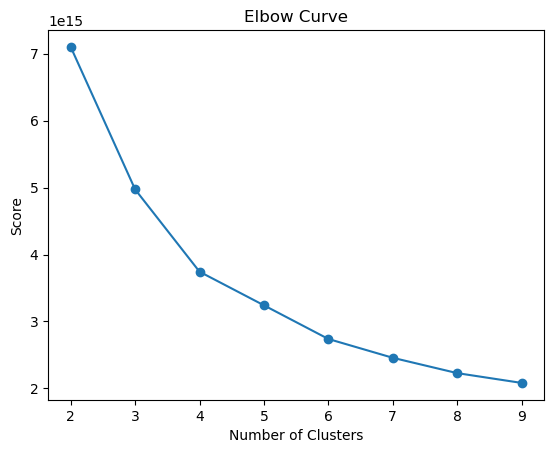

In [15]:
import pandas as pd
import pylab as pl
kdf = pd.DataFrame(errors[2:])
kdf.columns = ["errors"]
new_col = range(2,10)
kdf.insert(0, 'cluster', new_col)
pl.plot(kdf.cluster, kdf.errors, '-o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()